Hence we combined the six independent data sets and produced a final unique map of 67,543 nucleosomes (Supplementary Methods), allowing two neighbouring nucleosomes to overlap by no more than 40 base pairs (bp) (occupying 79.9% of the genome, Supplementary Table 2)

This file contains a list of nucleosomes in the unique map with NCP score and NCP score/noise ratio. Tab delimited text file. The names of the four columns are: chromosome ID, position, NCP score and NCP score/noise ratio. This file was replaced online on 21 March 2013. (TXT 2638 kb)

In [1]:
path_to_centromere_positions = '../input/41586_2012_BFnature11142_MOESM263_ESM.txt'
path_to_combined_wiggle = '../dataAnalysis/combinedWiggle.wig'
path_to_single_wiggle = '../input/wiggles/yEK19a_6_FDDP220013497-1a_HY_trimmed_forward_notrimmed.sorted.bam.wig'

In [2]:
import pandas as pd
from readers.newWiggleReader import newWiggleReader
import numpy as np
import matplotlib.pyplot as plt
from readers.NucleosomePositionReader import NucleosomePositionReader
import math
from tqdm import tqdm
from roman import toRoman

In [3]:
df_nuc = NucleosomePositionReader(path_to_centromere_positions).get_positions_as_dataframe()
df_nuc

,chromosome ID,position,NCP score,NCP score/noise ratio
0,chrI,72,1.06,0.599
1,chrI,371,4.26,1.331
2,chrI,633,2.10,2.442
3,chrI,859,1.62,1.276
4,chrI,1032,7.62,4.563
...,...,...,...,...
67543,chrXVI,941990,3.07,1.073
67544,chrXVI,942165,3.84,1.433
67545,chrXVI,942318,5.07,4.447
67546,chrXVI,942502,2.28,1.572


In [4]:
def findNearestNucleosome(position: int, nucleosome_positions):
    return np.min(np.abs(nucleosome_positions - position))

# df_nuc # positions of nucleosomes
chrom_sizes = newWiggleReader().yeastChromosomeSizes # dict of chromosomeSizes
distances_to_nearest_nucleosomes = {f'chr{toRoman(n)}': [] for n in range(1,17)} # absolute positions to the nearest nucleosome

for chr_name, df in df_nuc.groupby('chromosome ID'):
    nuc_pos = np.sort(df.position.values)
    for position in tqdm(range(1, chrom_sizes[chr_name] + 1), desc=f'{chr_name}: '):
        distances_to_nearest_nucleosomes[chr_name].append(findNearestNucleosome(position, nuc_pos))

distances_to_nearest_nucleosomes

chrXVI: 100%|██████████| 948066/948066 [00:29<00:00, 32599.85it/s]


{'chrI': [71,
  70,
  69,
  68,
  67,
  66,
  65,
  64,
  63,
  62,
  61,
  60,
  59,
  58,
  57,
  56,
  55,
  54,
  53,
  52,
  51,
  50,
  49,
  48,
  47,
  46,
  45,
  44,
  43,
  42,
  41,
  40,
  39,
  38,
  37,
  36,
  35,
  34,
  33,
  32,
  31,
  30,
  29,
  28,
  27,
  26,
  25,
  24,
  23,
  22,
  21,
  20,
  19,
  18,
  17,
  16,
  15,
  14,
  13,
  12,
  11,
  10,
  9,
  8,
  7,
  6,
  5,
  4,
  3,
  2,
  1,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  9

In [5]:
reader = newWiggleReader()
df_wiggle = reader.read(path_to_combined_wiggle)
df_wiggle

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,M
1,60.0,0.0,5.0,14.0,1.0,9.0,4.0,4.0,69.0,1.0,20.0,10.0,41.0,0.0,102.0,0.0,0.0
2,35.0,25.0,15.0,21.0,10.0,0.0,1.0,6.0,8.0,0.0,10.0,0.0,5.0,11.0,11.0,3.0,0.0
3,0.0,0.0,17.0,52.0,0.0,122.0,1.0,0.0,1.0,2.0,5.0,0.0,0.0,1.0,2.0,0.0,0.0
4,0.0,0.0,1.0,43.0,0.0,99.0,1.0,2.0,0.0,0.0,8.0,0.0,2.0,0.0,7.0,0.0,0.0
5,0.0,0.0,6.0,1.0,330.0,126.0,0.0,4.0,15.0,3.0,2.0,14.0,0.0,0.0,12.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1531930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1531931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1531932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


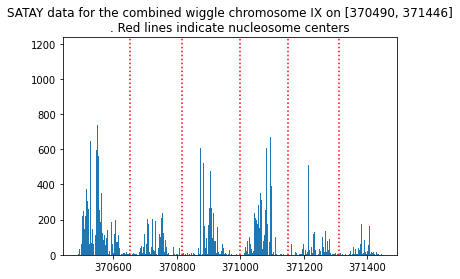

In [6]:
region_start, region_stop = (370490,371446)
chromosome = 'IX'
nucleosome_positions = df_nuc[df_nuc['chromosome ID'] == 'chr'+chromosome].position

insertions = df_wiggle[chromosome].loc[region_start:region_stop]
plt.bar(insertions.index, insertions.values, width=1)
for nucleosome_position in nucleosome_positions[(region_start < nucleosome_positions) * (nucleosome_positions < region_stop)].values:
    plt.axvline(nucleosome_position, c='red', linestyle='dotted')
plt.title(
    f'SATAY data for the combined wiggle chromosome {chromosome} on [{region_start}, {region_stop}]\n. Red lines indicate nucleosome centers')
plt.show()

In [7]:
count_nearest_nuc = {}
for (chr_name, distances) in tqdm(distances_to_nearest_nucleosomes.items()):
    count_nearest_nuc[chr_name] = {i: np.sum(distances == i) for i in np.unique(distances)}
count_nearest_nuc

100%|██████████| 16/16 [27:04<00:00, 101.55s/it]


{'chrI': {0: 1293,
  1: 2586,
  2: 2586,
  3: 2586,
  4: 2586,
  5: 2586,
  6: 2586,
  7: 2586,
  8: 2586,
  9: 2586,
  10: 2586,
  11: 2586,
  12: 2586,
  13: 2586,
  14: 2586,
  15: 2586,
  16: 2586,
  17: 2586,
  18: 2586,
  19: 2586,
  20: 2586,
  21: 2586,
  22: 2586,
  23: 2586,
  24: 2586,
  25: 2586,
  26: 2586,
  27: 2586,
  28: 2586,
  29: 2586,
  30: 2586,
  31: 2586,
  32: 2586,
  33: 2586,
  34: 2586,
  35: 2586,
  36: 2586,
  37: 2586,
  38: 2586,
  39: 2586,
  40: 2586,
  41: 2586,
  42: 2586,
  43: 2586,
  44: 2586,
  45: 2586,
  46: 2586,
  47: 2586,
  48: 2586,
  49: 2586,
  50: 2586,
  51: 2586,
  52: 2586,
  53: 2586,
  54: 2564,
  55: 2539,
  56: 2520,
  57: 2490,
  58: 2465,
  59: 2447,
  60: 2417,
  61: 2381,
  62: 2349,
  63: 2327,
  64: 2305,
  65: 2265,
  66: 2218,
  67: 2193,
  68: 2156,
  69: 2138,
  70: 2103,
  71: 2057,
  72: 2007,
  73: 1968,
  74: 1928,
  75: 1854,
  76: 1798,
  77: 1731,
  78: 1685,
  79: 1634,
  80: 1537,
  81: 1438,
  82: 1341,
  83: 

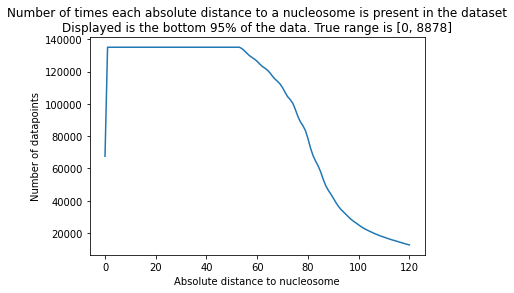

In [8]:
df_nearest_nuc = pd.DataFrame(count_nearest_nuc)
df_nearest_nuc['sum'] = df_nearest_nuc[[f'chr{toRoman(n)}' for n in range(1,17)]].sum(axis=1)
max_distance = 1
all_positions = df_nearest_nuc['sum'].sum()
bottom95 = df_nearest_nuc['sum'].iloc[:max_distance]
fraction = bottom95.sum() / all_positions
while (fraction < 0.95):
    max_distance += 1
    bottom95 = df_nearest_nuc['sum'].iloc[:max_distance]
    fraction = bottom95.sum() / all_positions
bottom95.plot()
plt.xlabel('Absolute distance to nucleosome')
plt.ylabel('Number of datapoints')
plt.title(
    'Number of times each absolute distance to a nucleosome is present in the dataset\n'
    f'Displayed is the bottom 95% of the data. True range is [0, {len(df_nearest_nuc)-1}]'
)
plt.show()

In [9]:
internucleosomal_distances = {}
for chromosome_name, dataframe in df_nuc.groupby('chromosome ID'):
    nucleosome_positions = np.sort(dataframe.position.values)
    internucleosomal_distances[chromosome_name] = np.array([b - a for (a,b) in zip(nucleosome_positions[:-1], nucleosome_positions[1:])])

In [10]:
def get_upper_limit_95_percent(combined_internucleosomal_distances):
    distance_sum = np.sum(combined_internucleosomal_distances)
    data_fraction = 1
    for upper_limit in np.unique(np.sort(combined_internucleosomal_distances))[::-1]:
        if data_fraction <= 0.95:
            break
        limited_distance_sum = np.sum(combined_internucleosomal_distances[combined_internucleosomal_distances < upper_limit])
        data_fraction = round(limited_distance_sum / distance_sum, 2)
    return upper_limit

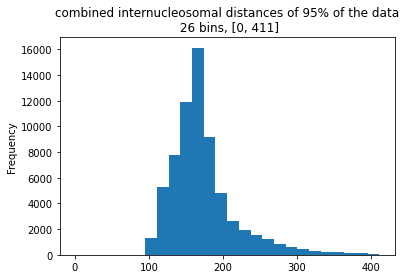

In [11]:
combined_internucleosomal_distances = np.concatenate(np.fromiter(internucleosomal_distances.values(), dtype=np.ndarray))
upper_limit = get_upper_limit_95_percent(combined_internucleosomal_distances)
bins = int(np.round(np.sqrt(np.unique(combined_internucleosomal_distances).size)))
df_t = pd.DataFrame(combined_internucleosomal_distances, columns=['combined internucleosomal distances'])

df_t.plot.hist(
    bins=bins,
    range=(0,upper_limit),
    title=f'combined internucleosomal distances of 95% of the data\n '
          f'{bins} bins, [0, {upper_limit}]',
    legend=False,
)
plt.show()

In [12]:
normalized_mean = np.round(np.mean(combined_internucleosomal_distances[combined_internucleosomal_distances < upper_limit]))
smallest_distance = np.min(combined_internucleosomal_distances)
print(
    f'min: {smallest_distance}\n'
    f'mean: {np.round(np.mean(combined_internucleosomal_distances))}\n'
    f'max: {np.max(combined_internucleosomal_distances)}\n'
    f'mean normalized: {normalized_mean}\n'
)


min: 107
mean: 178.0
max: 17757
mean normalized: 173.0



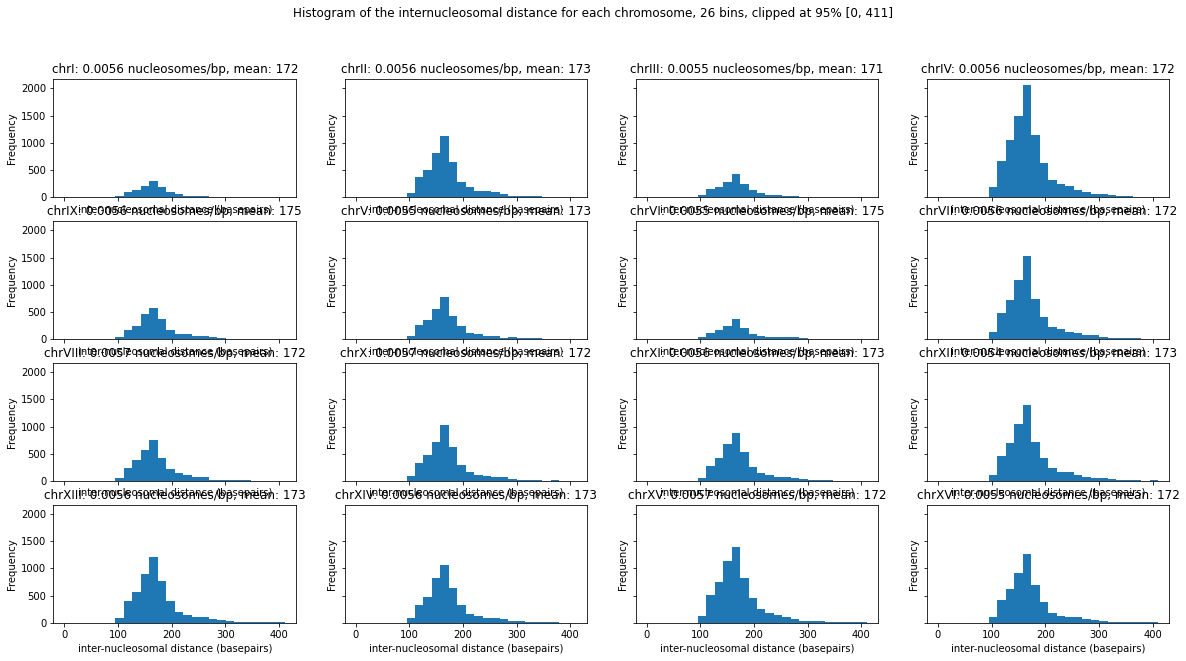

In [13]:
fig, axes = plt.subplots(4,4, figsize=(20,10), sharex=True, sharey=True)
chromosome_sizes = newWiggleReader().yeastChromosomeSizes
for i, (chromosome_name, distances) in enumerate(internucleosomal_distances.items()):
    num_nucleosomes = len(distances)
    mean_normalized = np.mean(distances[distances < upper_limit])
    size_chrom = chromosome_sizes[chromosome_name]
    ax = axes[math.floor(i/4)][i % 4]
    ax.hist(distances, bins=bins, range=(0,upper_limit))
    ax.set_title(f'{chromosome_name}: {round(num_nucleosomes/size_chrom, 4)} nucleosomes/bp, mean: {round(mean_normalized)}')
    ax.set_xlabel('inter-nucleosomal distance (basepairs)')
    ax.set_ylabel('Frequency')
fig.suptitle(f'Histogram of the internucleosomal distance for each chromosome, {bins} bins, clipped at 95% [0, {upper_limit}]')
plt.show()

In [14]:
reader = newWiggleReader()
reader.read(path_to_combined_wiggle)
min_absolute_distance = round(smallest_distance / 2)
mean_absolute_distance = round(normalized_mean / 2)

def findNearestNucleosome(position: int, nucleosome_positions):
    return np.min(np.abs(nucleosome_positions - position))

indexed_reads = {}

for (chromosome_name, df) in tqdm(df_nuc.groupby('chromosome ID')):
    nucleosome_positions = np.sort(df['position'].values)
    indexed_reads[chromosome_name] = {}
    df_reads = reader.getChromosomeByName(chromosome_name.strip('chr'))
    for position in df_reads[df_reads>0]:
        indexed_position = findNearestNucleosome(int(position), nucleosome_positions)
        if indexed_position <= mean_absolute_distance:
            if indexed_position in indexed_reads[chromosome_name]:
                indexed_reads[chromosome_name][indexed_position] += 1
            else:
                indexed_reads[chromosome_name][indexed_position] = 1

indexed_reads


100%|██████████| 16/16 [02:56<00:00, 11.03s/it]


{'chrI': {12: 741,
  37: 1024,
  71: 20540,
  70: 12194,
  60: 2303,
  68: 5794,
  8: 770,
  26: 861,
  56: 1862,
  47: 1305,
  66: 4026,
  38: 1003,
  61: 2367,
  13: 736,
  36: 1051,
  34: 968,
  29: 914,
  32: 943,
  25: 944,
  62: 2495,
  39: 1090,
  58: 2010,
  28: 878,
  31: 962,
  85: 194,
  15: 723,
  41: 1152,
  4: 724,
  69: 8233,
  49: 1461,
  67: 4778,
  46: 1247,
  64: 2944,
  75: 207,
  59: 2098,
  11: 713,
  54: 1634,
  3: 739,
  43: 1171,
  6: 722,
  16: 753,
  55: 1735,
  52: 1509,
  22: 842,
  24: 814,
  18: 744,
  48: 1310,
  27: 858,
  20: 815,
  10: 745,
  2: 747,
  42: 1135,
  23: 843,
  86: 176,
  78: 214,
  53: 1687,
  45: 1222,
  80: 207,
  17: 757,
  30: 922,
  57: 1900,
  65: 3337,
  77: 219,
  79: 212,
  51: 1457,
  50: 1474,
  40: 1103,
  5: 747,
  81: 224,
  1: 740,
  33: 940,
  35: 996,
  76: 195,
  44: 1247,
  84: 201,
  14: 749,
  83: 170,
  63: 2795,
  7: 743,
  19: 754,
  9: 716,
  21: 832,
  0: 331,
  73: 200,
  72: 206,
  82: 223,
  74: 175},
 'chrI

16it [00:05,  3.11it/s]


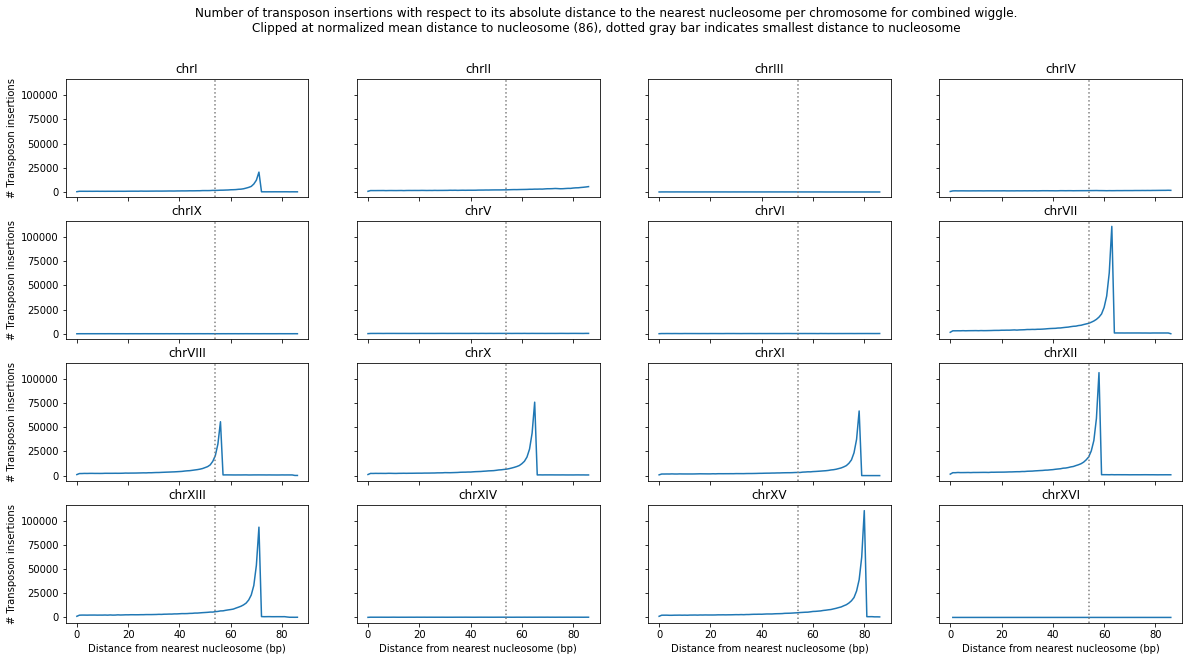

In [15]:
fig, axes = plt.subplots(4,4, figsize=(20,10), sharex=True, sharey=True)
for (i, (chromosome, read_dict)) in tqdm(enumerate(indexed_reads.items())):
    # print(chromosome)
    ax = axes[math.floor(i/4)][i % 4]
    df_indexed_reads = pd.Series(read_dict).sort_index().plot(ax=ax)
    ax.axvline(min_absolute_distance, c='grey', linestyle='dotted')
    ax.set_ylabel('# Transposon insertions')
    ax.set_xlabel('Distance from nearest nucleosome (bp)')
    ax.set_title(chromosome)

fig.suptitle(f'Number of transposon insertions with respect to its absolute distance to the nearest nucleosome per chromosome for combined wiggle.\n'
             f'Clipped at normalized mean distance to nucleosome ({mean_absolute_distance}), dotted gray bar indicates smallest distance to nucleosome')
plt.show()

In [16]:
totalDf = pd.DataFrame()

for (chromosome, index_reads_dict) in tqdm(indexed_reads.items()):
    df = pd.DataFrame(index_reads_dict.values(), index=index_reads_dict.keys(), columns=['reads']).sort_index().iloc[:mean_absolute_distance]
    totalDf[chromosome] = df

totalDf


100%|██████████| 16/16 [00:00<00:00, 266.57it/s]


,chrI,chrII,chrIII,chrIV,chrIX,chrV,chrVI,chrVII,chrVIII,chrX,chrXI,chrXII,chrXIII,chrXIV,chrXV,chrXVI
0,331,713,33,567,41,206,123,1576,1075,1150,801,1526,1175,89,1165,NaN
1,740,1479,71,1148,89,370,272,3113,2140,2280,1653,3017,2324,233,2289,2.0
2,747,1465,80,1218,95,385,259,3102,2161,2236,1645,3019,2426,214,2318,1.0
3,739,1465,92,1151,84,380,289,3142,2286,2329,1691,3245,2420,218,2326,NaN
4,724,1494,72,1195,95,404,277,3121,2234,2279,1668,3115,2362,215,2211,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,224,4303,32,1662,94,437,307,850,689,736,38,825,795,230,784,1.0
82,223,4367,42,1687,99,411,293,843,706,747,27,872,446,226,768,1.0
83,170,4669,21,1707,101,399,284,851,702,710,31,864,178,217,800,1.0
84,201,4901,33,1712,92,376,272,856,696,726,31,886,181,203,594,NaN


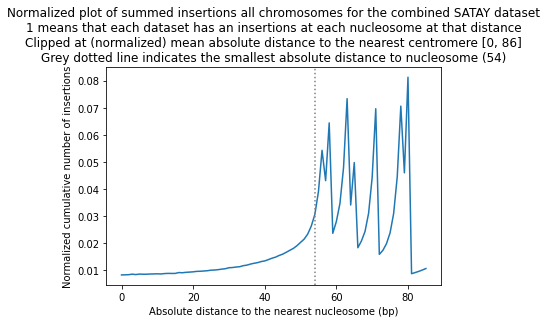

In [17]:
# totalDf.sum(axis=1)
totalDf['sum'] = totalDf[[f'chr{toRoman(n)}' for n in range(1,17)]].sum(axis=1)
totalDf['normalized'] = (totalDf['sum'] / df_nearest_nuc['sum'].iloc[:len(totalDf)]) / 19
totalDf['normalized'].plot()
plt.title(
    f'Normalized plot of summed insertions all chromosomes for the combined SATAY dataset\n'
    f'1 means that each dataset has an insertions at each nucleosome at that distance\n'
    f'Clipped at (normalized) mean absolute distance to the nearest centromere [0, {mean_absolute_distance}]\n'
    f'Grey dotted line indicates the smallest absolute distance to nucleosome ({min_absolute_distance})'
)
plt.axvline(min_absolute_distance, c='grey', linestyle='dotted')
plt.ylabel('Normalized cumulative number of insertions')
plt.xlabel('Absolute distance to the nearest nucleosome (bp)')
plt.show()

In [18]:
reader = newWiggleReader()
df_single_wiggle = reader.read('../input/wiggles/yEK19a_7_FDDP220013498-1a_HY_trimmed_forward_notrimmed.sorted.bam.wig')

In [19]:
df_sw_chromosomal = df_single_wiggle[[toRoman(n) for n in range(1,17)]]
sw_chrom_all_reads = np.concatenate(df_sw_chromosomal.values)
sw_chrom_all_reads_nonzero = sw_chrom_all_reads[sw_chrom_all_reads > 0]
total_readcount = np.sum(sw_chrom_all_reads_nonzero)
normalized_readcount = total_readcount.copy()

In [20]:
for readcount in np.unique(sw_chrom_all_reads_nonzero)[::-1]:
    normalized_readcount = np.sum(sw_chrom_all_reads_nonzero[sw_chrom_all_reads_nonzero < readcount])
    data_fraction = normalized_readcount / total_readcount
    if round(data_fraction, 2) <= 0.95:
        break
print(data_fraction, normalized_readcount, readcount, total_readcount)





0.9549886318406604 17515160.0 415.0 18340700.0


In [21]:
paths_to_wiggles = {
    'yEK19a_6_FDDP220013497-1a_HY_trimmed_forward_notrimmed.sorted.bam.wig': 'wt1-1',
    'yEK19a_7_FDDP220013498-1a_HY_trimmed_forward_notrimmed.sorted.bam.wig': 'wt1-2',
    'yEK19a_8_FDDP220013499-1a_HY_trimmed_forward_notrimmed.sorted.bam.wig': 'wt1-3',
    'yEK19b_12_FDDP220013501-1a_HY_trimmed_forward_notrimmed.sorted.bam.wig': 'wt1-4',
    'yEK19b_4_FDDP220013500-2a_HTWL7DSX2_L4_trimmed_forward_notrimmed.sorted.bam.wig': 'wt1-5',
    'yEK19c_7_FDDP220013502-1a_HY_trimmed_forward_notrimmed.sorted.bam.wig': 'wt1-6',
    'yEK19c_9_FDDP220013503-1a_HY_trimmed_forward_notrimmed.sorted.bam.wig': 'wt1-7',
    'FD11_FDDP210435830-2a_HWYKKDSX2_L1_trimmed_forward_notrimmed.sorted.bam.wig': 'wt2-1',
    'FD12_FDDP210435831-2a_HWYKKDSX2_L2_trimmed_forward_notrimmed.sorted.bam.wig': 'wt2-2',
    'FD7_1_FDDP210435821-2a_HTWL7DSX2_L4_trimmed_forward_notrimmed.sorted.bam.wig': 'wt2-3',
    'FD9_1_FDDP210435827-2a_HWYKKDSX2_L1_trimmed_forward_notrimmed.sorted.bam.wig': 'wt2-4',
    'FD9_2_FDDP210435828-2a_HWYKKDSX2_L2_trimmed_forward_notrimmed.sorted.bam.wig': 'wt2-5',
    'FD9_3_FDDP210435829-2a_HWYKKDSX2_L2_trimmed_forward_notrimmed.sorted.bam.wig': 'wt2-6',
    'yEK23a_23_FDDP220013504-2a_HTWL7DSX2_L4_trimmed_forward_notrimmed.sorted.bam.wig': 'mt1',
    'yEK23a_27_FDDP220013505-1a_HY_trimmed_forward_notrimmed.sorted.bam.wig': 'mt2',
    'yEK23a_32_FDDP220013506-2a_HW_trimmed_forward_notrimmed.sorted.bam.wig': 'mt3',
    'yEK23b_1_FDDP220013508-1a_HY_trimmed_forward_notrimmed.sorted.bam.wig': 'mt4',
    'yEK23b_2_FDDP220013509-1a_HY_trimmed_forward_notrimmed.sorted.bam.wig': 'mt5',
    'yEK23c_10_FDDP220013511-2a_HWTTJDSX2_L3_trimmed_forward_notrimmed.sorted.bam.wig': 'mt6',
}

reader = newWiggleReader()

for (path, nickname) in tqdm(paths_to_wiggles.items()):
    df_single_wiggle = reader.read(f'/Users/IngmarVisser/MEP (NB5900) 44EC/All Enzos Wiggles/{path}')
    # df_single_wiggle = removeHighestFivePercent(df_single_wiggle)
    def calculate_sum_insertions(row, range=10, df=df_single_wiggle):
        chromosomeRoman = row['chromosome ID'].strip('chr')
        pos = row['position']
        region_around_nucleosome = df[chromosomeRoman].iloc[pos - range:pos + range]
        return np.sum(region_around_nucleosome > 0)

    df_nuc[nickname] = df_nuc.apply(calculate_sum_insertions, axis=1)

100%|██████████| 19/19 [07:44<00:00, 24.47s/it]


In [22]:
df_nuc

,chromosome ID,position,NCP score,NCP score/noise ratio,wt1-1,wt1-2,wt1-3,wt1-4,wt1-5,wt1-6,...,wt2-3,wt2-4,wt2-5,wt2-6,mt1,mt2,mt3,mt4,mt5,mt6
0,chrI,72,1.06,0.599,0,1,0,2,0,3,...,1,0,0,0,1,2,1,2,1,2
1,chrI,371,4.26,1.331,2,3,3,2,3,3,...,0,3,2,2,0,1,2,3,2,1
2,chrI,633,2.10,2.442,1,3,2,2,2,1,...,0,0,1,1,1,1,0,0,1,1
3,chrI,859,1.62,1.276,1,0,2,0,0,1,...,1,0,0,0,0,1,0,1,0,0
4,chrI,1032,7.62,4.563,0,0,2,0,1,1,...,2,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67543,chrXVI,941990,3.07,1.073,2,2,2,3,2,2,...,0,2,3,3,1,2,2,1,2,1
67544,chrXVI,942165,3.84,1.433,1,0,0,2,1,1,...,0,1,0,0,0,2,1,0,0,0
67545,chrXVI,942318,5.07,4.447,1,2,2,2,2,2,...,0,0,1,0,0,0,0,0,1,0
67546,chrXVI,942502,2.28,1.572,1,1,0,1,2,3,...,1,2,1,2,1,2,1,2,3,0


In [23]:
df_nuc['sum'] = df_nuc[paths_to_wiggles.values()].sum(axis=1)

In [24]:
df_nuc['highest variance'] = df_nuc[paths_to_wiggles.values()].max(axis=1) - df_nuc[paths_to_wiggles.values()].min(axis=1)

In [25]:
df_nuc['variational fraction']=df_nuc['highest variance'] / df_nuc['sum']


In [26]:
df_nuc[(df_nuc['variational fraction'] < 1) * (df_nuc['sum'] > 50)]


,chromosome ID,position,NCP score,NCP score/noise ratio,wt1-1,wt1-2,wt1-3,wt1-4,wt1-5,wt1-6,...,wt2-6,mt1,mt2,mt3,mt4,mt5,mt6,sum,highest variance,variational fraction
53,chrI,9400,2.97,1.492,3,4,3,6,4,4,...,6,1,6,5,6,7,3,94,6,0.063830
55,chrI,9754,1.92,0.906,6,6,5,5,6,5,...,6,2,4,10,8,6,8,113,8,0.070796
56,chrI,9941,1.94,2.395,2,2,8,2,2,2,...,6,1,4,5,1,3,3,65,7,0.107692
58,chrI,10297,1.05,0.890,4,6,5,5,6,7,...,5,6,9,5,9,8,5,110,5,0.045455
59,chrI,10463,1.98,1.922,5,4,4,5,6,2,...,6,4,6,4,6,4,3,90,4,0.044444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67518,chrXVI,937682,2.88,1.147,2,5,3,5,1,2,...,4,3,3,3,2,2,3,59,4,0.067797
67526,chrXVI,938954,0.98,1.256,3,4,2,4,5,1,...,3,1,3,2,1,3,4,56,4,0.071429
67527,chrXVI,939129,0.29,0.580,5,3,2,4,2,5,...,4,3,4,1,4,3,3,69,5,0.072464
67540,chrXVI,941288,0.32,0.542,5,5,8,4,4,8,...,4,5,4,4,5,5,3,95,5,0.052632
